В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных.

В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets.
Целевая переменная – MedHouseVal.

Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.
Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.
Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?
Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
a. Сделайте выводы.
b. Удалите признаки на основании полученных значений, выводов.
c. Повторите п. 3, п. 4 на измененных данных.
Исследуйте оставленные признаки на выбросы.
a. Удалите выбросы в случае обнаружения.
b. Повторите п. 3, п. 4 на измененных данных.
Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
a. Повторите п. 3, п. 4 на измененных данных.
Сформулируйте выводы по проделанной работе.
a. Кратко опишите какие преобразования были сделаны с данными.
b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение трех моделей классификации:
- на основе всех неизмененных признаков;
- на основе признаков, отобранных по значениям корреляций;
- на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них.

Должны быть выведены метрики RMSE, R2 моделей.

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

In [9]:
housing = datasets.fetch_california_housing(as_frame=True)
data = pd.DataFrame(data= np.c_[housing['data'], housing['target']],
                     columns= housing['feature_names'] + ['target'])
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

In [10]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)

Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('RMSE: ', mean_squared_error(y_test, y_pred, squared=True))
print('R2: ', r2_score(y_test, y_pred))

RMSE:  0.5558915986952441
R2:  0.575787706032451


Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

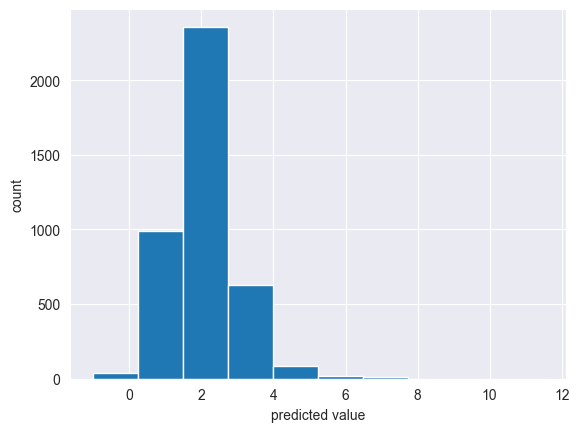

In [27]:
plt.hist(y_pred)
plt.ylabel('count')
plt.xlabel('predicted value')
plt.show()

## ВЫВОД
выбросы есть

Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
a. Сделайте выводы.
b. Удалите признаки на основании полученных значений, выводов.
c. Повторите п. 3, п. 4 на измененных данных.

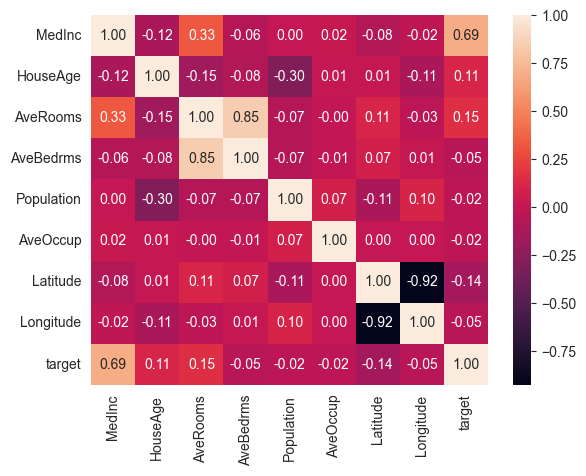

In [30]:
sns.heatmap(data.corr(), annot=True, fmt=".2f")

Сильная корреляция между признаками:
- averooms и avebedrms
- longitude и latitude
Удалим признаки с сильной корреляцией
- averooms
- latitude
- longitude

In [31]:
data = data.drop(['AveRooms', 'Latitude', 'Longitude'], axis=1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('RMSE: ', mean_squared_error(y_test, y_pred, squared=True))
print('R2: ', r2_score(y_test, y_pred))

RMSE:  0.6607653018709136
R2:  0.49575642960113975


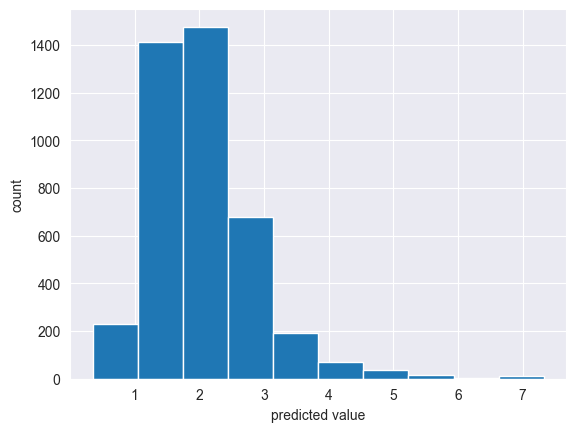

In [34]:
plt.hist(y_pred)
plt.ylabel('count')
plt.xlabel('predicted value')
plt.show()

## ВЫВОД
Выбросы остались, при этом качество модели ухудшилось
Необходимо продолжить исследование

Исследуйте оставленные признаки на выбросы.
a. Удалите выбросы в случае обнаружения.
b. Повторите п. 3, п. 4 на измененных данных.

In [35]:
data.describe()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,1.096675,1425.476744,3.070655,2.068558
std,1.899822,12.585558,0.473911,1132.462122,10.386050,1.153956
min,0.499900,1.000000,0.333333,3.000000,0.692308,0.149990
25%,2.563400,18.000000,1.006079,787.000000,2.429741,1.196000
50%,3.534800,29.000000,1.048780,1166.000000,2.818116,1.797000
75%,4.743250,37.000000,1.099526,1725.000000,3.282261,2.647250
max,15.000100,52.000000,34.066667,35682.000000,1243.333333,5.000010


RMSE:  0.5292667941559632
R2:  0.5559976717144577


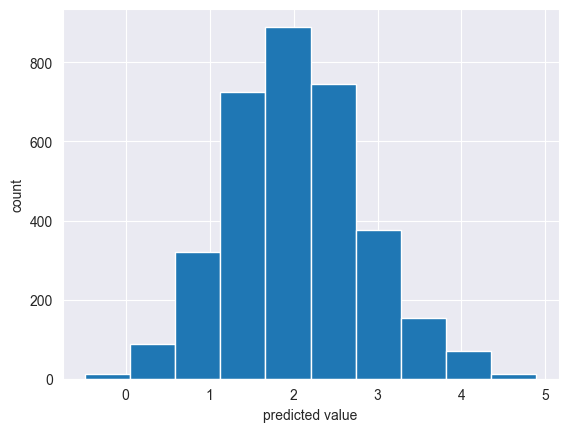

In [36]:
columns_with_outliers = ['AveBedrms', 'Population', 'AveOccup', 'MedInc']
for column in columns_with_outliers:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('RMSE: ', mean_squared_error(y_test, y_pred, squared=True))
print('R2: ', r2_score(y_test, y_pred))
plt.hist(y_pred)
plt.ylabel('count')
plt.xlabel('predicted value')
plt.show()

## ВЫВОД
После обработки выбросов - целевая переменная приблизилась к нормальному распределению

Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
a. Повторите п. 3, п. 4 на измененных данных.

In [37]:
# log от Population
data['Population'] = np.log(data['Population'])
# извлечение квадратного корня от MedInc
data['MedInc'] = data['MedInc'] ** 0.5

RMSE:  0.5577368981632161
R2:  0.5321140791571153


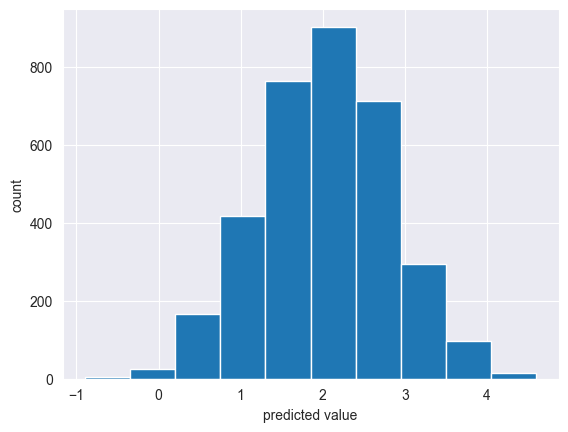

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('RMSE: ', mean_squared_error(y_test, y_pred, squared=True))
print('R2: ', r2_score(y_test, y_pred))
plt.hist(y_pred)
plt.ylabel('count')
plt.xlabel('predicted value')
plt.show()

## ВЫВОД
Сделано:
1. Удалены признаки с сильной корреляцией
2. Обработаны выбросы - квартильный метод
3. Преобразованы признаки - log от Population и извлечение квадратного корня от MedInc

Наибольшее улучшение RMSE и R2 получено при удалении признаков с сильной корреляцией
Выполнение математичесих преобразований - не привело к улучшению качеству модели. Возможно, целесообразно было бы применить другие преобразования (например, StandartScaler).

Модель возвращает приемлимый результат, но необходимо продолжить работу над признаками, так как на данный момент, они не являются оптимальными для данной задачи.